In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns = ['Class label' , 'Alcohol' , 'Malic acid']

In [3]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [4]:
df.sample(5)

,Class label,Alcohol,Malic acid
85,2,12.67,0.98
99,2,12.29,3.17
5,1,14.20,1.76
165,3,13.73,4.36
106,2,12.25,1.73


In [5]:
# we can clealy see that alcohol values reange are greater than malic acid 

####  exploring feature distributions using KDE a step in EDA

<Axes: xlabel='Alcohol', ylabel='Density'>

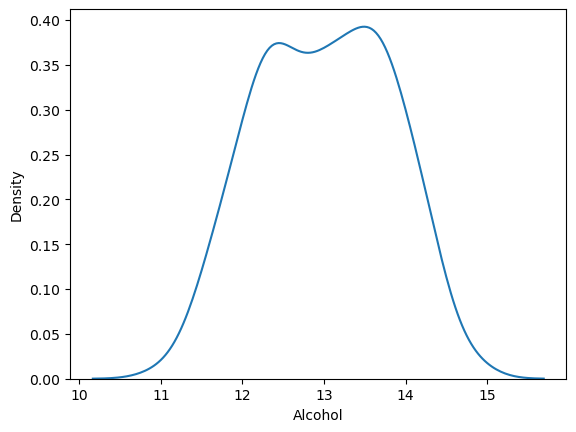

In [ ]:
sns.kdeplot(df['Alcohol'])#pdf , KDE -> kernal Density estimation (showing where the data is more concentrated)

<Axes: xlabel='Malic acid', ylabel='Density'>

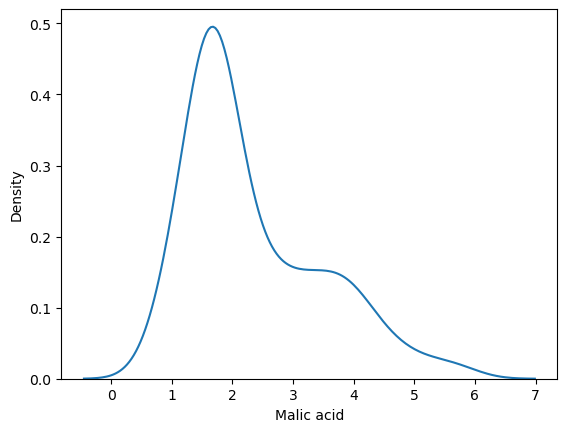

In [7]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

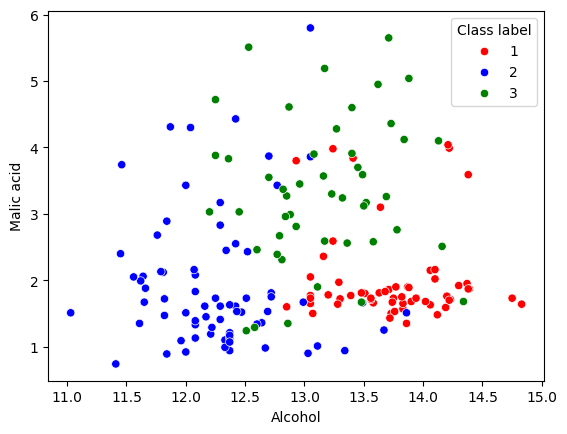

In [ ]:
color_dict = {1:'red' , 2:'blue' , 3 : 'green'}
sns.scatterplot(data = df , x  = 'Alcohol' , y = 'Malic acid' , hue='Class label' ,palette=color_dict)

In [13]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train , y_test = train_test_split(df.drop('Class label' ,axis=1) , df['Class label'] , random_state= 0 , test_size=0.3)

In [14]:
X_train.shape ,X_test.shape

((124, 2), (54, 2))

In [18]:
X_train

,Alcohol,Malic acid
22,13.71,1.86
108,12.22,1.29
175,13.27,4.28
145,13.16,3.57
71,13.86,1.51
...,...,...
103,11.82,1.72
67,12.37,1.17
117,12.42,1.61
47,13.90,1.68


In [30]:
np.round(X_train.describe() , 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()#making object of minmaxscaler
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

#transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_test_scaled# it is in numpy array

array([[ 0.72849462,  0.16386555],
       [ 0.47311828,  0.37394958],
       [ 0.36021505,  0.05042017],
       [ 0.68010753,  0.17647059],
       [ 0.54301075,  1.03151261],
       [ 0.14247312,  0.24369748],
       [ 0.81451613,  0.26470588],
       [ 0.35752688,  0.61764706],
       [ 0.32795699,  0.17647059],
       [ 0.28225806,  0.19747899],
       [ 0.62634409,  0.35084034],
       [ 0.76612903,  0.87184874],
       [ 0.85215054,  0.18277311],
       [ 0.36021505,  0.03781513],
       [ 0.68548387,  0.35504202],
       [ 0.26075269,  0.00630252],
       [ 0.73387097,  0.13445378],
       [ 0.84946237,  0.14705882],
       [ 0.4327957 ,  0.0987395 ],
       [ 0.75268817,  0.15966387],
       [ 0.55913978,  0.02521008],
       [ 0.54301075,  0.15966387],
       [ 0.59408602,  0.35714286],
       [ 0.39784946,  0.17647059],
       [ 0.34946237,  0.04411765],
       [ 0.40053763,  0.32352941],
       [ 0.37634409,  0.13445378],
       [ 0.30376344,  0.1512605 ],
       [ 0.19623656,

In [24]:
X_train_scaled = pd.DataFrame(X_train_scaled  , columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled  , columns=X_test.columns)

##### converted X_test and X_train sets into dataframes

In [28]:
X_train_scaled

,Alcohol,Malic acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252
...,...,...
119,0.212366,0.174370
120,0.360215,0.058824
121,0.373656,0.151261
122,0.771505,0.165966


In [29]:
np.round(X_train_scaled.describe() ,1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


#### plotting scatter plot between X_train and X_train_scaled

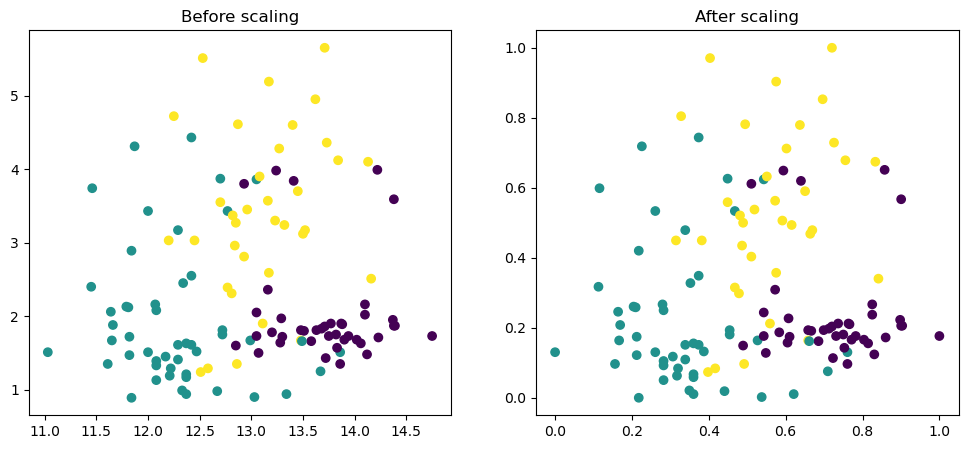

In [36]:
fig , (ax1 ,ax2) = plt.subplots(ncols = 2 , figsize=(12,5))

ax1.scatter(data = X_train , x = 'Alcohol' , y = 'Malic acid', c=y_train )
ax1.set_title("Before scaling")
ax2.scatter(data = X_train_scaled , x = 'Alcohol' , y = 'Malic acid' , c = y_train )
ax2.set_title("After scaling")
plt.show()

<Axes: title={'center': 'After Standard Scaling'}, xlabel='Alcohol', ylabel='Density'>

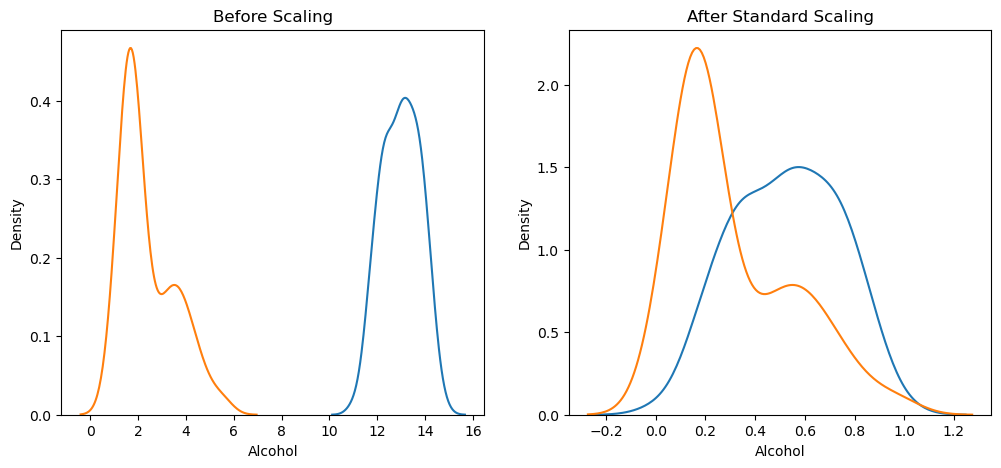

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax = ax2)